# TensorFlow Ops
- Basic operations
- Tensor types
- Project speed dating
- Placeholders and feeding inputs
- Lazy loading

In [1]:
import tensorflow as tf
a = tf.constant(5, name='a')
b = tf.constant(3, name='b')
c = tf.add(a, b)

with tf.Session() as sess:
    print(sess.run(c))
    writer = tf.summary.FileWriter('tmp/', sess.graph)
writer.close()

8


```
tensorboard --logdir=tmp
```

![](Lecture-0201.JPG)

__TensorBoard用途__：

> Learn use TensorBoard well and often.

> It will help a lot when you build complicated models.

网络的可视化是相当重要的。 
- 首先要有整体性的把握， 
- 其次对于训练过程中观察参数变化，比如cost，weights等，可以在训练过程中对数据有更深刻的把握，
- 以及debug查错等，
- 最重要的，这种整洁与条理性，实际上也是强迫自己树立思路——深度学习或神经网络的学习，绝不是调调参凑一凑的问题，要一开始就培养对数据及模型的intuition。

## `tf.constant`

- `tf.constant`
- Tensor filled with a specific value
    - `tf.zeros`
    - `tf.zeros_like`
    - `tf.ones`
    - `tf.ones_like`
    - `tf.fill`
    - `tf.linspace`
    - `tf.range`
    - `tf.random_normal`
    - `tf.truncated_normal`
    - `tf.random_uniform`
    - `tf.random_shuffle`
    - `tf.random_crop`
    - `tf.multinomial`
    - `tf.random_gamma`
    - `tf.set_random_seed`

In [3]:
tfzeros = tf.zeros([2,3], tf.int32)
with tf.Session() as sess:
    print(sess.run(tfzeros))

[[0 0 0]
 [0 0 0]]


In [7]:
input_tensor = tf.constant([[0, 1], [2,3], [4,5]], name='input_tensor')
tfzeroslike = tf.zeros_like(input_tensor)
with tf.Session() as sess:
    print('input_tensor = \n' + str(sess.run(input_tensor)))
    print('tfzeroslike = \n' + str(sess.run(tfzeroslike)))

input_tensor = 
[[0 1]
 [2 3]
 [4 5]]
tfzeroslike = 
[[0 0]
 [0 0]
 [0 0]]


In [8]:
tfones = tf.ones([2,3], name='tfones')
tfoneslike = tf.ones_like(input_tensor, name='tfoneslike')
with tf.Session() as sess:
    print('tfones = \n', str(sess.run(tfones)))
    print('tfoneslike = \n', str(sess.run(tfoneslike)))

tfones = 
 [[ 1.  1.  1.]
 [ 1.  1.  1.]]
tfoneslike = 
 [[1 1]
 [1 1]
 [1 1]]


In [9]:
tffill = tf.fill([2,3, 2], 8)
with tf.Session() as sess:
    print('tffill = \n' + str(sess.run(tffill)))

tffill = 
[[[8 8]
  [8 8]
  [8 8]]

 [[8 8]
  [8 8]
  [8 8]]]


In [20]:
xaxis = tf.linspace(-4., 5., 10, name='xaxis') # [start] [stop] must be tf.float, and [num] must tf.int
tfrange = tf.range(1, 10)
with tf.Session() as sess:
    print('xaxis = \n' + str(sess.run(xaxis)))
    print('tfrange = \n' + str(sess.run(tfrange)))

xaxis = 
[-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
tfrange = 
[1 2 3 4 5 6 7 8 9]


Randomly Generated Constants
![Randomly Generated Constants](Lecture-02RandomlyGeneratedConstants.JPG)

In [27]:
random_normal = tf.random_normal([1]) # Outputs random value from a normal distribution
truncated_normal = tf.truncated_normal([1]) # Outputs random value from a truncated normal distribution
with tf.Session() as sess:
    print('random_normal = \n', str(sess.run(random_normal)))
    print('truncated_normal = \n', str(sess.run(truncated_normal)))

random_normal = 
 [ 1.38999164]
truncated_normal = 
 [-0.584822]


Operations in TensorFlow
![Operations](Lecture-02Operations.JPG)

## TF vs NP data Types
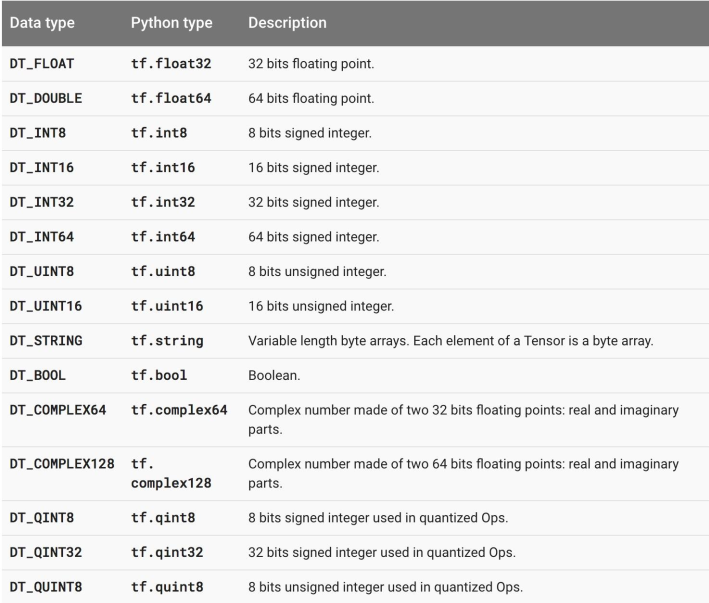

__Attention:__ Do not use Python native types for tensors because TensorFlow has to infer Python type. 

Beware when using Numpy arrays because Numpy and TensorFlow might become not so compatible in the future. 

In [1]:
import tensorflow as tf
my_const = tf.constant([1.0, 2.0], name='my_const')
with tf.Session() as sess:
    print(sess.graph.as_graph_def())

node {
  name: "my_const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\200?\000\000\000@"
      }
    }
  }
}
versions {
  producer: 24
}



## `tf.Variable`
> Constants are stored in the graph definition.

>This makes loading graphs expensive when constants are big.

> Only use constants for primitive types.

> Use variables or readers for more data that requires more memory.

`tf.Variable` is a class, but `tf.constant` is an operation.

So, actually, `tf.Variable` holds several operations or built-in methods. 
```
x = tf.Variable()
x.initializer # init op
x.value() # read op
x.assign() # write op
x.assign_add() # and more ...
```
但是这些内置函数操作，如一般的计算图一样，只是赋予了一种计算形式，实际上在没有`tf.Session().run()`之前都没有起到如何实质性的赋值操作等。 

You have to initialize your `tf.Variables`
``` python
sess.run(tf.global_variables_initializer() )
```

__Attention__: `tf.Variable` is a class, but `tf.constant` is an operation. 

- The easiest way is initializing __all variables__ at once
- initialize only a subset of variables
- initialize a single variable. 

- `tf.Variable.assign()`
- `assign_add()`
- `assign_sub()`

In [2]:
sess = tf.InteractiveSession()
a = tf.constant(5)
b = tf.constant(3)
c = a * b
print(c.eval()) # without specifying the context `sess`
sess.close()

15


In [28]:
W = tf.Variable(10)
assign_op = W.assign(100)
with tf.Session() as sess:
    sess.run(W.initializer)
    print(sess.run(W))
    
    #
    sess.run(assign_op)
    print(sess.run(W))

10
100


In [31]:
# 利用上述特性实现变量的递增：
it = tf.Variable(0)
add_op = it.assign_add(1)
with tf.Session() as sess:
    sess.run(it.initializer)
    for _ in range(5):
        sess.run(add_op)
        print(sess.run(it))

1
2
3
4
5


## Session vs InteractiveSession
The only difference is an InteractiveSession makes itself the default. 

## Control dependencies
define which ops should be run first.

## why `tf.placeholder`
`tf.placeholder(dtype, shape=None, name=None)`

We can later supply their own data when they need to execute the computation.

Feed the values to placeholder using a dictionary.

__Attention__:
- shape=None, means that tensor of any shape will be accepted as value for placeholder.
- shape=None, is easy to construct graphs, but nightmarish for debugging. 

## Lazy loading
计算仍然是一样进行，只是在TensorBoard上是否还存在该运算节点。